In [30]:
import numpy as np
import torch
import torchvision
from torchvision import datasets,models,transforms
from torch.utils.data import DataLoader
from torch.utils import data
from torch import nn
import matplotlib.pyplot as plt
import os
from PIL import Image


In [5]:
#必须创建两个方法   __getitrm__ 这个方法可以使这个类可以切片
                  #__len__ 方法，能够返回数据集的长度
                  #__init__初始化方法，告诉类输入图片的路径等等参数
class Mydataset(data.Dataset):   #必须从dataset中继承，创建一个子类
    def __init__(self,root) :
        self.imgs_path=root  #图片路径
    def __getitem__(self,index): #index索引的位置
        img_path=self.imgs_path[index]  #进行切片
        return img_path
    def __len__(self):
        return len(self.imgs_path)    #返回dataset的长度



In [6]:
import glob #glob方法可以获取某一个条件下的所有路径

In [9]:
all_image_path=glob.glob(r'D:\python\weather_dataset\*.jpg') #这样就获取到了这个路径下面所有以.jpg结尾的文件，返回的是路径

In [43]:
all_image_path

['D:\\python\\weather_dataset\\cloudy1.jpg',
 'D:\\python\\weather_dataset\\cloudy10.jpg',
 'D:\\python\\weather_dataset\\cloudy100.jpg',
 'D:\\python\\weather_dataset\\cloudy101.jpg',
 'D:\\python\\weather_dataset\\cloudy102.jpg',
 'D:\\python\\weather_dataset\\cloudy103.jpg',
 'D:\\python\\weather_dataset\\cloudy104.jpg',
 'D:\\python\\weather_dataset\\cloudy105.jpg',
 'D:\\python\\weather_dataset\\cloudy106.jpg',
 'D:\\python\\weather_dataset\\cloudy107.jpg',
 'D:\\python\\weather_dataset\\cloudy108.jpg',
 'D:\\python\\weather_dataset\\cloudy109.jpg',
 'D:\\python\\weather_dataset\\cloudy11.jpg',
 'D:\\python\\weather_dataset\\cloudy110.jpg',
 'D:\\python\\weather_dataset\\cloudy111.jpg',
 'D:\\python\\weather_dataset\\cloudy112.jpg',
 'D:\\python\\weather_dataset\\cloudy113.jpg',
 'D:\\python\\weather_dataset\\cloudy114.jpg',
 'D:\\python\\weather_dataset\\cloudy115.jpg',
 'D:\\python\\weather_dataset\\cloudy116.jpg',
 'D:\\python\\weather_dataset\\cloudy117.jpg',
 'D:\\python\\wea

In [11]:
weather_dataset=Mydataset(all_image_path)

In [13]:
len(weather_dataset)
weather_dataset[23]  #可以看出设置的两个方法都是可以正常使用的

'D:\\python\\weather_dataset\\cloudy12.jpg'

In [15]:
dl=DataLoader(weather_dataset,batch_size=4)

In [16]:
next(iter(dl))

['D:\\python\\weather_dataset\\cloudy1.jpg',
 'D:\\python\\weather_dataset\\cloudy10.jpg',
 'D:\\python\\weather_dataset\\cloudy100.jpg',
 'D:\\python\\weather_dataset\\cloudy101.jpg']

In [17]:
speices=['cloudy','rain','shine','sunrise']
speices_to_idx=dict((c,i) for i,c in enumerate(speices))#将各种类别转化为数字表示  enumerate()会返回一个对应位置 两个参数就是第一个是序号第二个是名称
                                                        #再调换个顺序，使得输出为 cloudy:1

In [21]:
idx_to_speces=dict((v,k) for k,v in speices_to_idx.items()) #通过序号去找图片类别

In [22]:
speices_to_idx,idx_to_speces

({'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3},
 {0: 'cloudy', 1: 'rain', 2: 'shine', 3: 'sunrise'})

In [25]:
all_labels=[]  #用来存标签的
for img in all_image_path:
    for i,c in enumerate(speices):
       if c in img:   #字符串的应用，查看某一个字符串中是否包含指定的字符串 如果当前类别（4种天气，c）在图片的地址中，就将其序号（i）写入标签组中
           all_labels.append(i)


In [44]:
all_labels[-5:],all_image_path[-5:],idx_to_speces


([3, 3, 3, 3, 3],
 ['D:\\python\\weather_dataset\\sunrise95.jpg',
  'D:\\python\\weather_dataset\\sunrise96.jpg',
  'D:\\python\\weather_dataset\\sunrise97.jpg',
  'D:\\python\\weather_dataset\\sunrise98.jpg',
  'D:\\python\\weather_dataset\\sunrise99.jpg'],
 {0: 'cloudy', 1: 'rain', 2: 'shine', 3: 'sunrise'})

In [55]:
transform=transforms.Compose([
    transforms.Resize((96,96)), #一定要这么口号带括号的resize 
    transforms.ToTensor()
])   

In [56]:
class Mydataset(data.Dataset):
    def __init__(self,img_paths,label,transform): #将标签也放入初始化中
        self.imgs=img_paths
        self.labels=label    #将标签
        self.transform=transform  #以及图像变换方法进行初始化
    def __getitem__(self,index):  #不再只是将图片的路径返回了，而是进行图片的读取转换之后再返回
        img=self.imgs[index]
        label=self.labels[index]

        pil_img=Image.open(img) #python里最重要的图像处理的库，用它来打开图片
        data=self.transform(pil_img)#这就是已经转换好的图像数据了

        return data,label
    def __len__(self):
        return len(self.imgs)

In [57]:
weather_dataset=Mydataset(all_image_path,all_labels,transform)

In [58]:
weather_dl=DataLoader(weather_dataset,batch_size=16,shuffle=True,)

In [63]:
imgs_batch,label_batch=next(iter(weather_dl))

In [65]:
imgs_batch.shape,label_batch.shape

(torch.Size([16, 3, 96, 96]), torch.Size([16]))

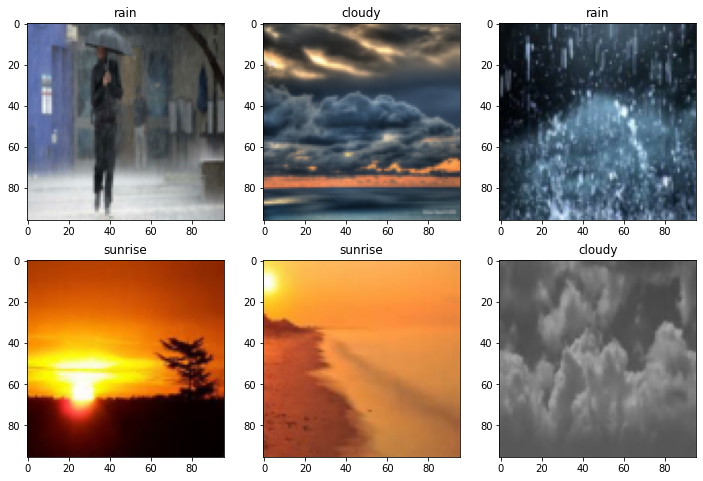

In [66]:
plt.figure(figsize=(12,8))  #创建个大一点的画布
for i,(img,label) in enumerate(zip(imgs_batch[:6],label_batch[:6])):  # i是序号
    img=(img.permute(1,2,0).numpy() ) #对图像进行变换使其可以被显示，将原本的第0个通道（颜色通道数）放到最后
    plt.subplot(2,3,i+1)  #子图一共2行三列，当次放在第i+1个子图上
    plt.title(idx_to_speces.get(label.item()))  #.get()就是获得对应的类别名称（这就是为什么之前要定义字典并将序号和名称换位置）,.item()获取其数值
    plt.imshow(img)

In [67]:
idx_to_speces.get(2)

'shine'

In [68]:
speices_to_idx.get('rain')

1

In [69]:
index=np.random.permutation(len(all_image_path)) #这种方法会返回乱序的输入值，比如括号里是3那就会0，1，2乱序返回如2，0，1等

In [70]:
index

array([801, 655, 538, ..., 107, 416,  68])

In [74]:
all_image_path=np.array(all_image_path)[index] #使用的是numpy的方法，所以使用之前要先化成ndarray类型
all_labels=np.array(all_labels)[index] 

In [81]:
all_image_path[:5]

array(['D:\\python\\weather_dataset\\sunrise130.jpg',
       'D:\\python\\weather_dataset\\shine227.jpg',
       'D:\\python\\weather_dataset\\shine121.jpg',
       'D:\\python\\weather_dataset\\cloudy269.jpg',
       'D:\\python\\weather_dataset\\rain42.jpg'], dtype='<U40')

In [80]:
for i in range(5):
    print(idx_to_speces.get(all_labels[i].item()))

sunrise
shine
shine
cloudy
rain


In [82]:
s=int(len(all_image_path)*0.8)#选取80%的图像作为训练集

train_imgs=all_image_path[:s]
train_labels=all_labels[:s]
test_imgs=all_image_path[s:]
test_labels=all_labels[s:] #这么划分的前提是对数据集做乱序

In [84]:
train_ds=Mydataset(train_imgs,train_labels,transform)
test_ds=Mydataset(test_imgs,test_labels,transform)
train_dl=DataLoader(train_ds,batch_size=16,shuffle=True)
trest_dl=DataLoader(test_ds,batch_size=16)

# 通过子类的一个小应用

In [ ]:
class new_dataset(data.Dataset):
    def __init__(self,some_dataset):#对其中的一部分dataset进行变化
        
